<a href="https://colab.research.google.com/github/Diegoeverton/notebook_colaboratory/blob/main/Desafio_Kaggle_Prevendo_Doen%C3%A7as_do_Cora%C3%A7%C3%A3o_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link you tube: https://www.youtube.com/watch?v=juKW9Hjsktc

link kaggke: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
video you tube: https://www.youtube.com/watch?v=5nS14oaOj1g

Contexto
Este conjunto de dados data de 1988 e é constituído por quatro bases de dados: Cleveland, Hungria, Suíça e Long Beach V. Contém 76 atributos, incluindo o atributo previsto, mas todas as experiências publicadas referem a utilização de um subconjunto de 14 deles. O campo "alvo" refere-se à presença de doença cardíaca no doente. É um número inteiro com o valor 0 = ausência de doença e 1 = doença.

Traduzido com a versão gratuita do tradutor - www.DeepL.com/Translator

Content
Attribute Information:

1 - age
2 - sex
3 - chest pain type (4 values)
4 - resting blood pressure
5 - serum cholestoral in mg/dl
6 - fasting blood sugar > 120 mg/dl
7 - resting electrocardiographic results (values 0,1,2)
8 - maximum heart rate achieved
9 - exercise induced angina
10 - oldpeak = ST depression induced by exercise relative to rest
11 - the slope of the peak exercise ST segment
12 - number of major vessels (0-3) colored by flourosopy
13 - thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

Os nomes e os números de segurança social dos doentes foram recentemente retirados da base de dados, tendo sido substituídos por valores fictícios.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Base de dados/kaggle /heart/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.duplicated().sum()

723

In [7]:
hd = df.drop_duplicates()
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [8]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

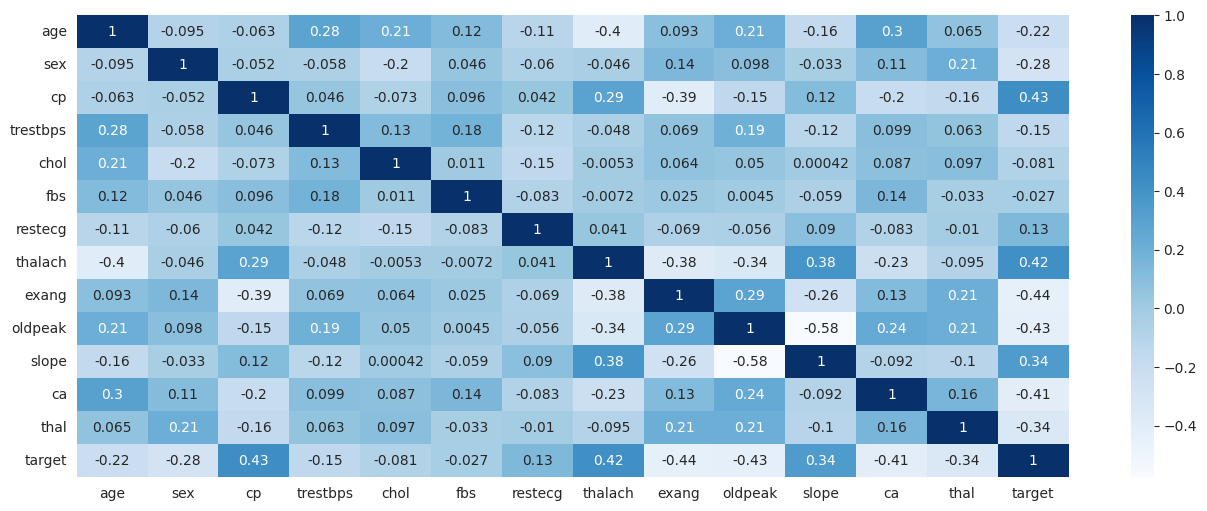

In [9]:
#hd.corr()
plt.figure(figsize = (16, 6))
sns.heatmap(hd.corr(), annot = True, cmap = 'Blues')

In [10]:
# separar otdas as colunas de variaveis categoriase colunas nominais
for c in hd.columns:
  print(f"{c}: {hd[c].nunique()}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [11]:
#separando em duas listas
categoricas = {'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'}
numericas = {'age', 'trestbps', 'chol', 'thalach', 'oldpeak' }

<ipython-input-12-8663c7fb0282>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = hd[c], kde = True)
<ipython-input-12-8663c7fb0282>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = hd[c], kde = True)
<ipython-input-12-8663c7fb0282>:7: UserWarning: 

`distplot` is a deprecated function an

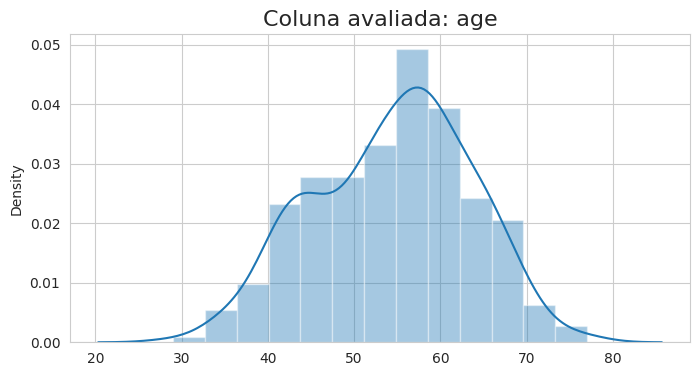

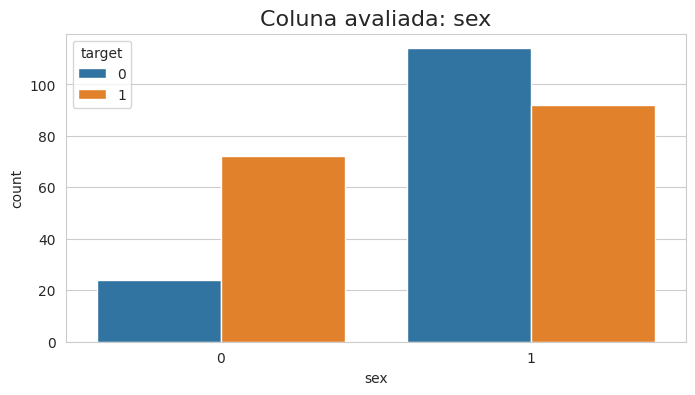

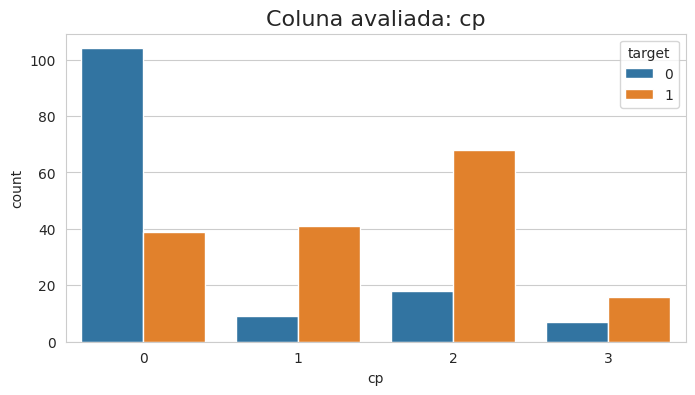

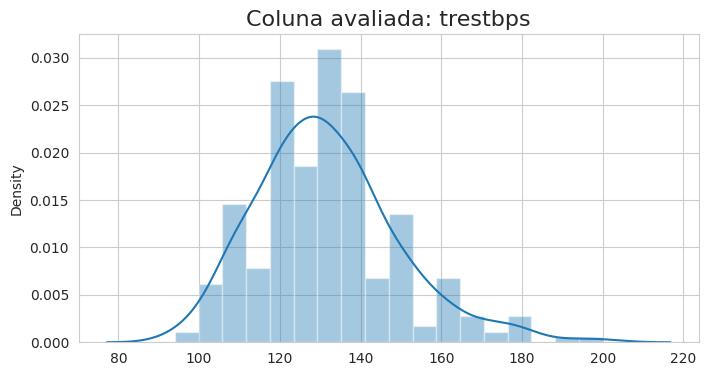

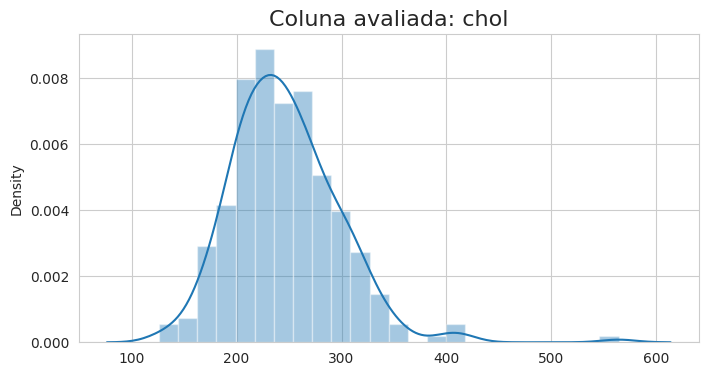

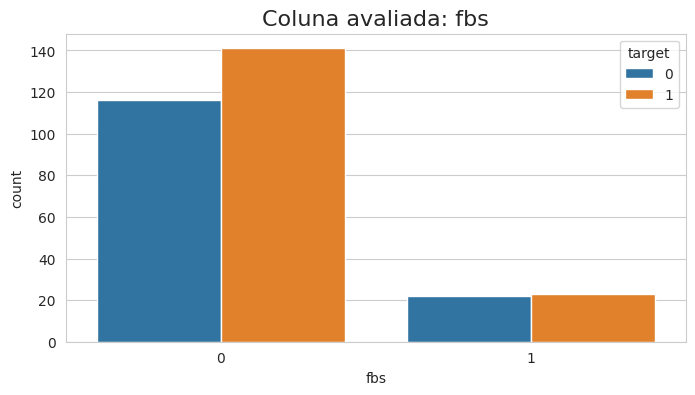

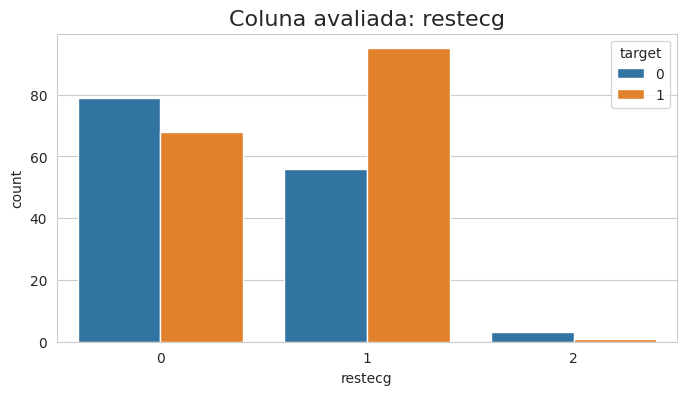

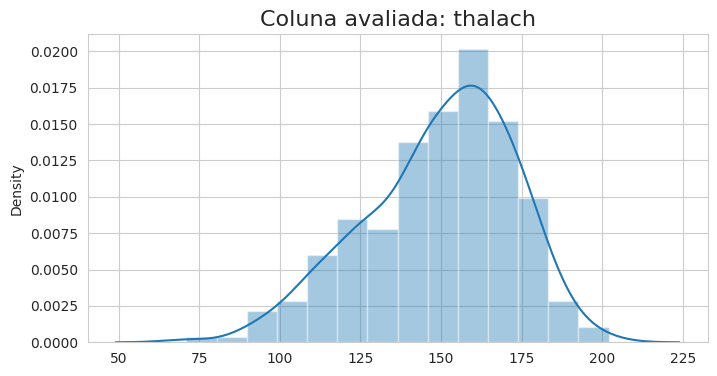

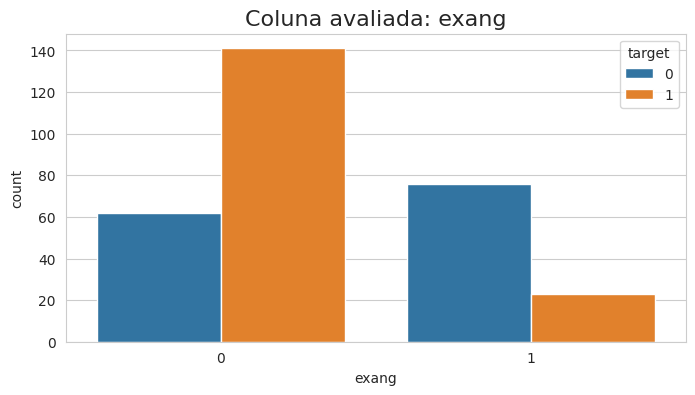

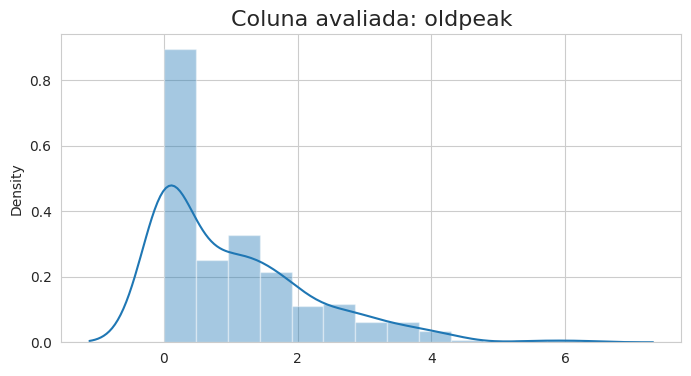

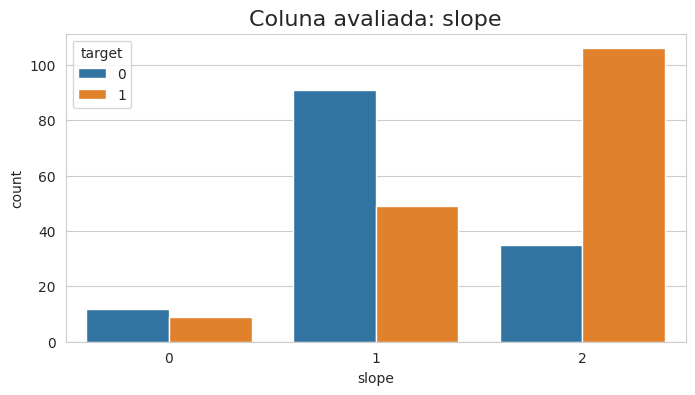

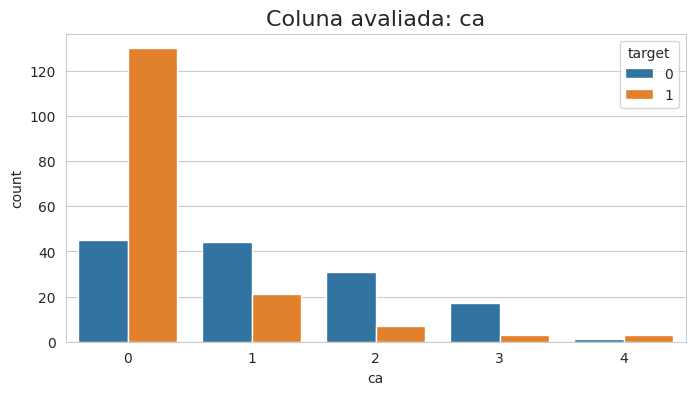

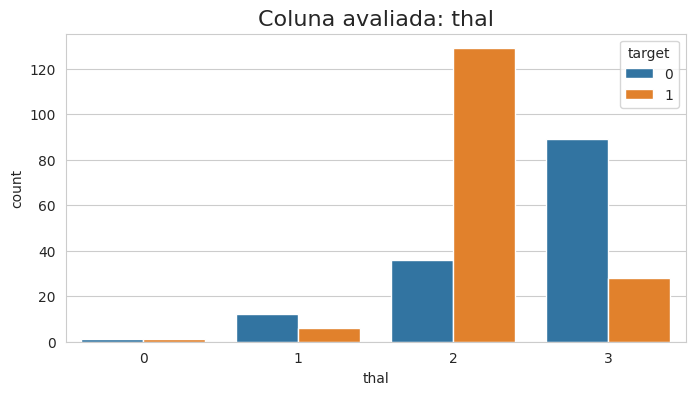

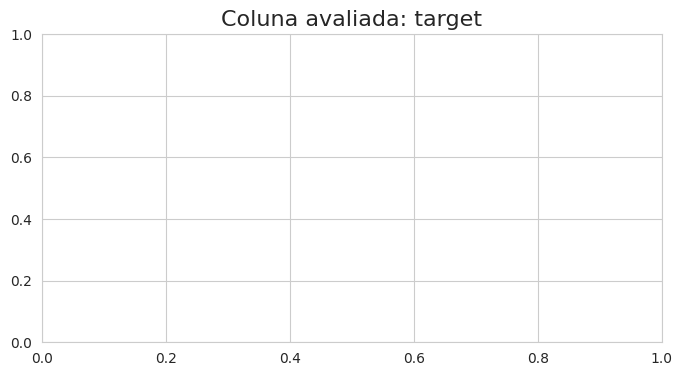

In [12]:
for c in hd.columns:
  plt.figure(figsize = (8,4))
  plt.title(f"Coluna avaliada: {c}", fontsize = 16)
  if c in categoricas:
    sns.countplot(x = hd[c], hue = hd['target'])
  if c in numericas:
    sns.distplot(x = hd[c], kde = True)

# Removendo Outliers

<Axes: >

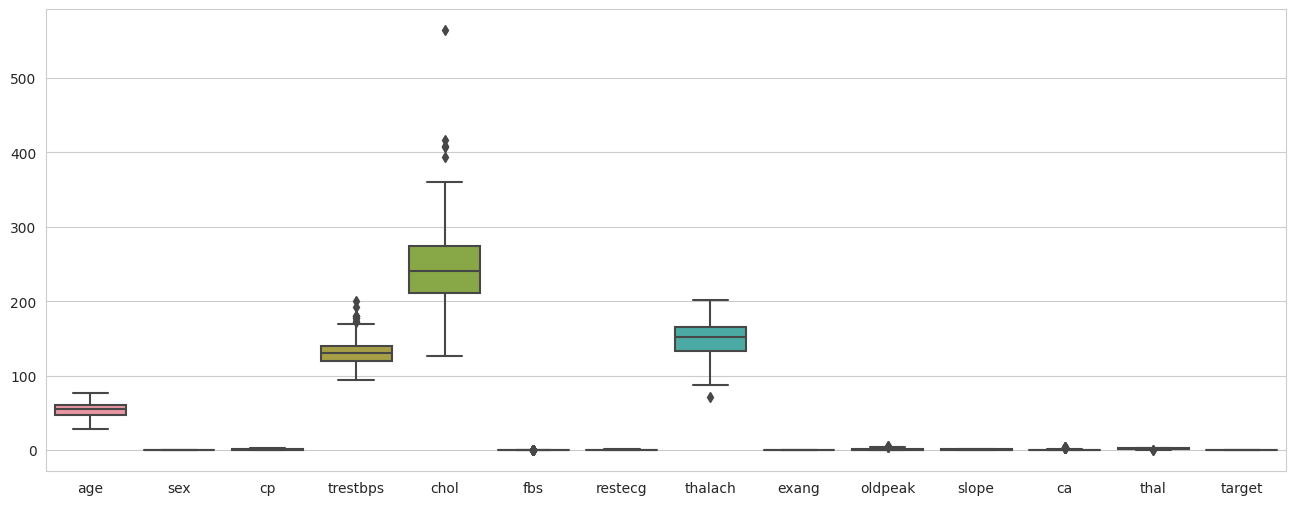

In [13]:
plt.figure(figsize = (16,6))
sns.boxplot(data = hd)

In [14]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
hd['trestbps'].quantile(0.99)

180.0

In [16]:
hd1 = hd[hd['trestbps'] < hd['trestbps'].quantile(0.99)]
hd1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<Axes: >

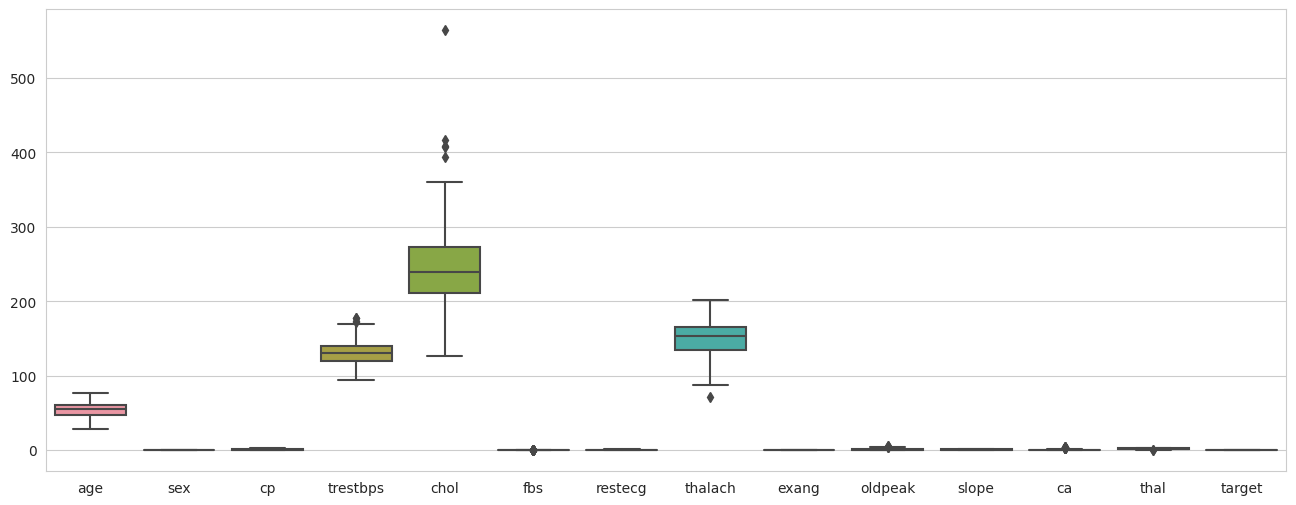

In [17]:
plt.figure(figsize = (16,6))
sns.boxplot(data = hd1)

In [18]:
hd1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.336700,0.686869,0.969697,130.680135,245.609428,0.144781,0.525253,149.565657,0.319865,1.030303,1.400673,0.720539,2.309764,0.548822
std,9.071847,0.464550,1.034420,16.154304,51.645776,0.352474,0.520072,22.844729,0.467211,1.146686,0.613254,1.009758,0.613755,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
hd1['chol'].quantile(0.98)

354.4799999999999

In [20]:
hd2 = hd[hd['chol'] < hd1['chol'].quantile(0.98)]
hd2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<Axes: >

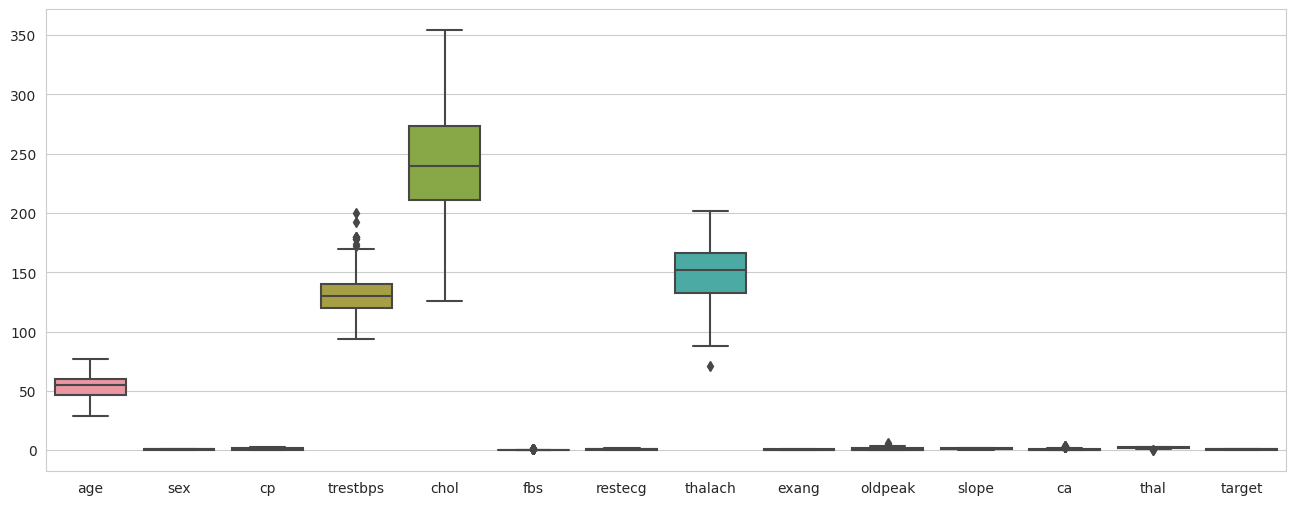

In [21]:
plt.figure(figsize = (16,6))
sns.boxplot(data = hd2)

In [22]:
hd2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.246622,0.695946,0.962838,131.435811,242.878378,0.148649,0.537162,149.462838,0.331081,1.029392,1.398649,0.712838,2.310811,0.540541
std,9.041711,0.460785,1.032672,17.589941,44.555873,0.356344,0.525909,23.117357,0.471399,1.158688,0.618800,1.002693,0.614529,0.499198
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000
75%,60.250000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
hd2['thalach'].quantile(0.005)

88.95

In [24]:
hd3 = hd2[hd2['thalach'] > hd2['thalach'].quantile(0.005)]

<Axes: >

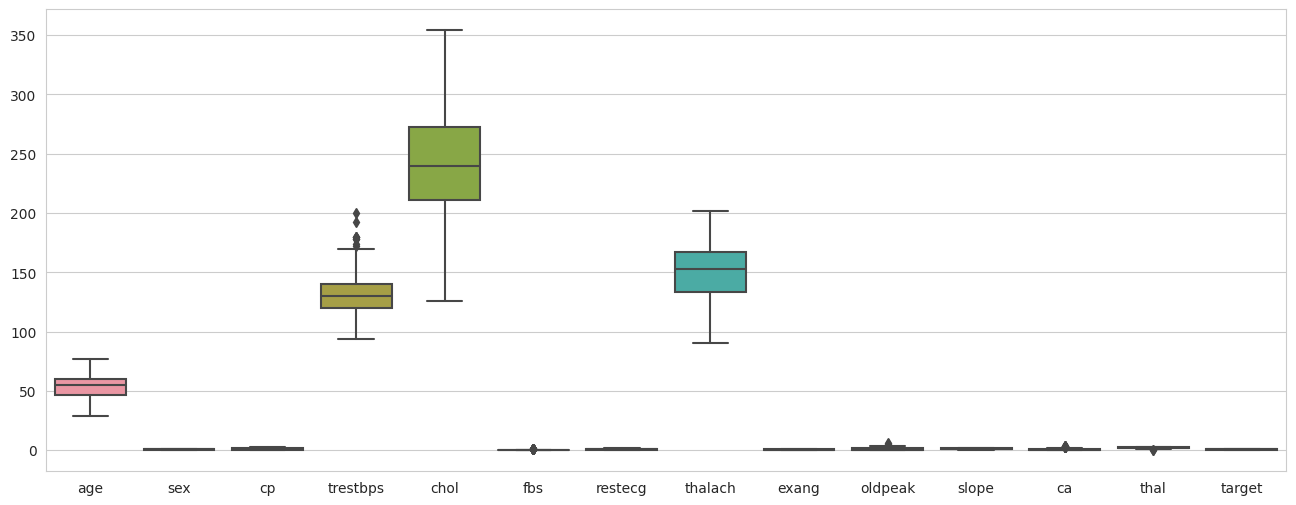

In [25]:
plt.figure(figsize = (16,6))
sns.boxplot(data = hd3)

In [26]:
hd3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,54.193878,0.693878,0.969388,131.404762,242.792517,0.149660,0.534014,149.938776,0.329932,1.028912,1.401361,0.714286,2.309524,0.544218
std,9.040287,0.461667,1.033111,17.596233,44.669295,0.357346,0.526304,22.448340,0.470990,1.162591,0.620028,1.005106,0.615037,0.498890
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,272.500000,0.000000,1.000000,166.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [27]:
categoricas = {'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'}
numericas = {'age', 'trestbps', 'chol', 'thalach', 'oldpeak' }

In [28]:
hd4 = pd.get_dummies(hd3, columns = {'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'})
hd4

<ipython-input-28-43ca81e9a4a7>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  hd4 = pd.get_dummies(hd3, columns = {'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'})


,age,trestbps,chol,thalach,oldpeak,target,ca_0,ca_1,ca_2,ca_3,...,slope_1,slope_2,sex_0,sex_1,thal_0,thal_1,thal_2,thal_3,fbs_0,fbs_1
0,52,125,212,168,1.0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,1,0
1,53,140,203,155,3.1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,70,145,174,125,2.6,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
3,61,148,203,161,0.0,0,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
4,62,138,294,106,1.9,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
733,44,108,141,175,0.6,1,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
739,52,128,255,161,0.0,0,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
843,59,160,273,125,0.0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0


In [29]:
hd4['chol'].max(), hd4['chol'].min()

(354, 126)

In [30]:
hd4.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'ca_0',
       'ca_1', 'ca_2', 'ca_3', 'ca_4', 'exang_0', 'exang_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'slope_0',
       'slope_1', 'slope_2', 'sex_0', 'sex_1', 'thal_0', 'thal_1', 'thal_2',
       'thal_3', 'fbs_0', 'fbs_1'],
      dtype='object')

In [31]:
X = hd4.drop('target', axis = 1)
y = hd4['target']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
#EScolhermos o algoritmo
log = LogisticRegression(max_iter=1000)

In [34]:
#Treinamos o algoritmo
log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [35]:
#Acuracia - verrificar o quanto ele acerta
log.score(X_train, y_train)

0.8765957446808511

In [36]:
log.score(X_test, y_test)

0.864406779661017

In [37]:
###
y_previsto = log.predict(X_test)
y_previsto

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0])

In [38]:
# comparar a previsao com o teste
accuracy_score(y_test, y_previsto)

0.864406779661017

In [39]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        26
           1       0.84      0.94      0.89        33

    accuracy                           0.86        59
   macro avg       0.87      0.85      0.86        59
weighted avg       0.87      0.86      0.86        59



In [40]:
confusion_matrix(y_test, y_previsto)

array([[20,  6],
       [ 2, 31]])

---

In [41]:
def relatorio_ml(df,algoritmo, opt=2):
  X = df.drop('target', axis = 1)
  y = df['target']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  if opt == 0:
    ml = algoritmo(max_iter = 1000)
  elif opt ==1:
    ml = algoritmo(n_estimators = 1000)
  elif opt ==2:
    ml = algoritmo()

  ml.fit(X_train, y_train)
  score_train = ml.score(X_train, y_train)
  print(f"Acuracia treino: {score_train * 100:.2f}%")
  score_test = ml.score(X_test, y_test)
  print(f"Acuracia teste: {score_test * 100:.2f}%")

  y_previsto = log.predict(X_test)
  print("------- Classification Report -----")
  print(classification_report(y_test, y_previsto))
  print("------Confusion Matriz-----------")
  confusao = confusion_matrix(y_test, y_previsto)
  sns.heatmap(confusao, annot = True, cmap = 'Blues')

  return score_train, score_test


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acuracia treino: 87.66%
Acuracia teste: 86.44%
------- Classification Report -----
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        26
           1       0.84      0.94      0.89        33

    accuracy                           0.86        59
   macro avg       0.87      0.85      0.86        59
weighted avg       0.87      0.86      0.86        59

------Confusion Matriz-----------


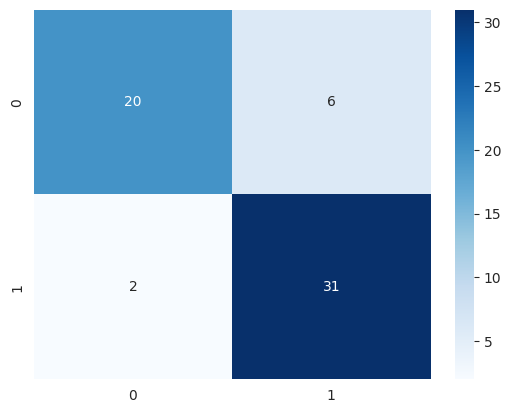

In [42]:
log_train, log_test = relatorio_ml(hd4, LogisticRegression, opt=0)

Acuracia treino: 100.00%
Acuracia teste: 79.66%
------- Classification Report -----
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        26
           1       0.84      0.94      0.89        33

    accuracy                           0.86        59
   macro avg       0.87      0.85      0.86        59
weighted avg       0.87      0.86      0.86        59

------Confusion Matriz-----------


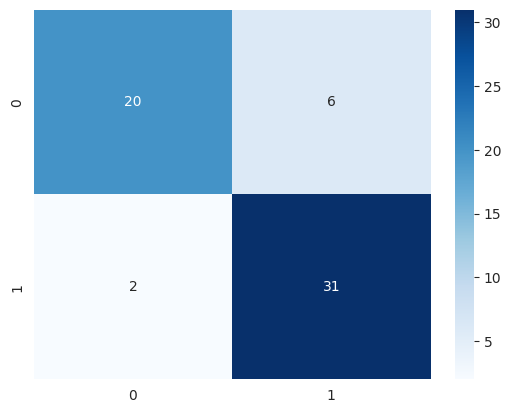

In [48]:
tree_train, tree_test = relatorio_ml(hd4, DecisionTreeClassifier)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acuracia treino: 87.66%
Acuracia teste: 86.44%
------- Classification Report -----
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        26
           1       0.84      0.94      0.89        33

    accuracy                           0.86        59
   macro avg       0.87      0.85      0.86        59
weighted avg       0.87      0.86      0.86        59

------Confusion Matriz-----------


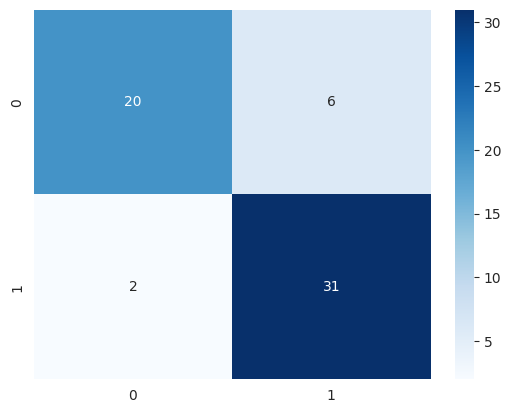

In [52]:
ada_train, ada_test = relatorio_ml(hd4, LogisticRegression, opt=0 )

Acuracia treino: 78.30%
Acuracia teste: 57.63%
------- Classification Report -----
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        26
           1       0.84      0.94      0.89        33

    accuracy                           0.86        59
   macro avg       0.87      0.85      0.86        59
weighted avg       0.87      0.86      0.86        59

------Confusion Matriz-----------


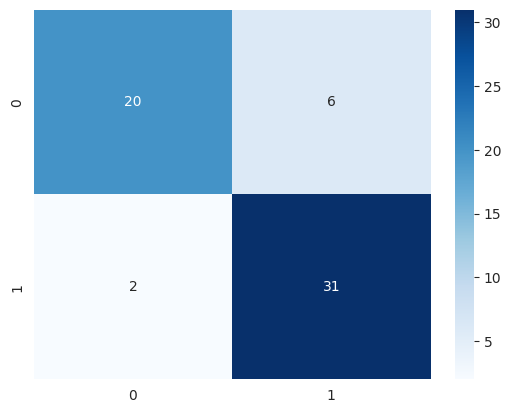

In [53]:
kn_train, kn_test = relatorio_ml(hd4, KNeighborsClassifier )

Acuracia treino: 100.00%
Acuracia teste: 81.36%
------- Classification Report -----
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        26
           1       0.84      0.94      0.89        33

    accuracy                           0.86        59
   macro avg       0.87      0.85      0.86        59
weighted avg       0.87      0.86      0.86        59

------Confusion Matriz-----------


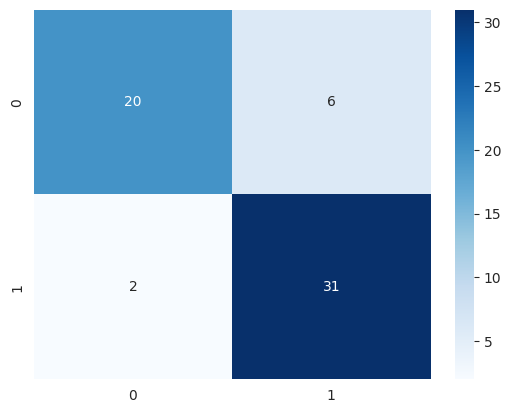

In [54]:
rand_train, rand_test = relatorio_ml(hd4, RandomForestClassifier)

In [62]:
import numpy as np

data = {
    'Models': ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Randon Forest Classifier', 'Ada Boost'],
    'Acuracia Treino': [round(log_train * 100, 2), round(tree_train * 100, 2), round(kn_train * 100, 2),
                        round(rand_train *100, 2), round(ada_train * 100, 2)],
    'Acuracia Teste': [round(log_test * 100, 2), round(tree_test * 100, 2), round(kn_test * 100, 2),
                       round(rand_test * 100, 2), round(ada_test * 100, 2)],
}
df = pd.DataFrame(data)
df.sort_values(by='Acuracia Teste', ascending=False, inplace=True)
df

,Models,Acuracia Treino,Acuracia Teste
0,Logistic Regression,87.66,86.44
4,Ada Boost,87.66,86.44
3,Randon Forest Classifier,100.00,81.36
1,Decision Tree,100.00,79.66
2,KNeighbors,78.30,57.63


In [72]:
from sklearn.preprocessing import StandardScaler
def relatorio_ml_scaler(df,algoritmo, opt=2):
  X = df.drop('target', axis = 1)
  y = df['target']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  scaler = StandardScaler()
  cols_scaler = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
  X_train[cols_scaler] = scaler.fit_transform(X_train[cols_scaler])
  X_test[cols_scaler] = scaler.transform(X_test[cols_scaler])

  if opt == 0:
    ml = algoritmo(max_iter = 1000)
  elif opt ==1:
    ml = algoritmo(n_estimators = 1000)
  elif opt ==2:
    ml = algoritmo()

  ml.fit(X_train, y_train)
  score_train = ml.score(X_train, y_train)
  print(f"Acuracia treino: {score_train * 100:.2f}%")
  score_test = ml.score(X_test, y_test)
  print(f"Acuracia teste: {score_test * 100:.2f}%")

  y_previsto = log.predict(X_test)
  print("------- Classification Report -----")
  print(classification_report(y_test, y_previsto))
  print("------Confusion Matriz-----------")
  confusao = confusion_matrix(y_test, y_previsto)
  sns.heatmap(confusao, annot = True, cmap = 'Blues')

  return score_train, score_test

Acuracia treino: 87.66%
Acuracia teste: 86.44%
------- Classification Report -----
              precision    recall  f1-score   support

           0       0.94      0.62      0.74        26
           1       0.76      0.97      0.85        33

    accuracy                           0.81        59
   macro avg       0.85      0.79      0.80        59
weighted avg       0.84      0.81      0.81        59

------Confusion Matriz-----------


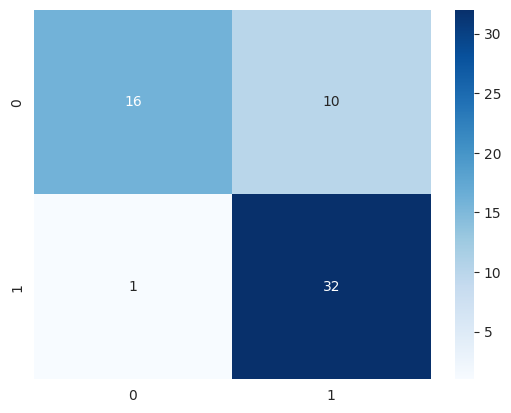

In [73]:
log_train_scaler, log_test_scaler = relatorio_ml_scaler(hd4, LogisticRegression, opt=0)

Acuracia treino: 100.00%
Acuracia teste: 74.58%
------- Classification Report -----
              precision    recall  f1-score   support

           0       0.94      0.62      0.74        26
           1       0.76      0.97      0.85        33

    accuracy                           0.81        59
   macro avg       0.85      0.79      0.80        59
weighted avg       0.84      0.81      0.81        59

------Confusion Matriz-----------


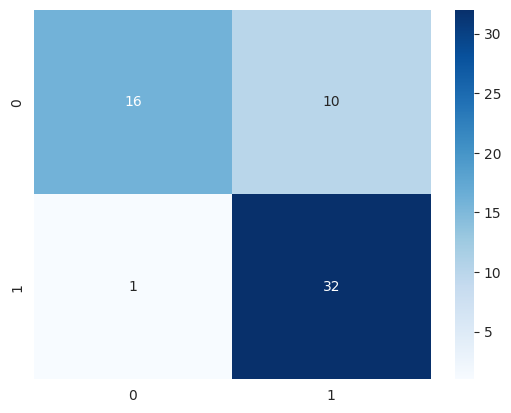

In [74]:
tree_train_scaler, tree_test_scaler = relatorio_ml_scaler(hd4, DecisionTreeClassifier)

Acuracia treino: 87.66%
Acuracia teste: 86.44%
------- Classification Report -----
              precision    recall  f1-score   support

           0       0.94      0.62      0.74        26
           1       0.76      0.97      0.85        33

    accuracy                           0.81        59
   macro avg       0.85      0.79      0.80        59
weighted avg       0.84      0.81      0.81        59

------Confusion Matriz-----------


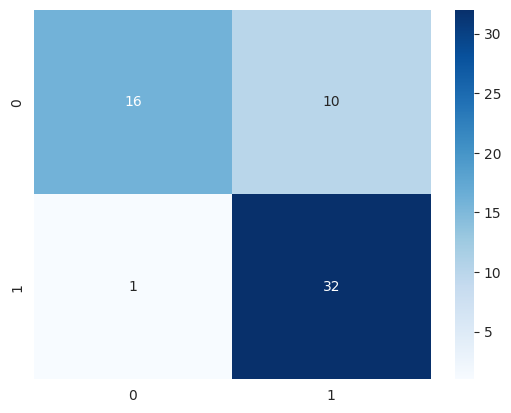

In [75]:
ada_train_scaler, ada_test_scaler = relatorio_ml_scaler(hd4, LogisticRegression, opt=0 )

Acuracia treino: 86.38%
Acuracia teste: 81.36%
------- Classification Report -----
              precision    recall  f1-score   support

           0       0.94      0.62      0.74        26
           1       0.76      0.97      0.85        33

    accuracy                           0.81        59
   macro avg       0.85      0.79      0.80        59
weighted avg       0.84      0.81      0.81        59

------Confusion Matriz-----------


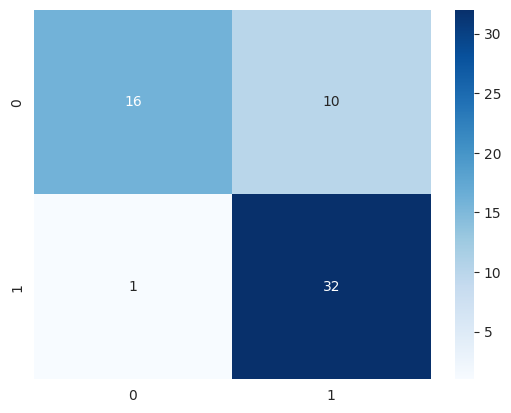

In [76]:
kn_train_scaler, kn_test_scaler = relatorio_ml_scaler(hd4, KNeighborsClassifier )

Acuracia treino: 100.00%
Acuracia teste: 81.36%
------- Classification Report -----
              precision    recall  f1-score   support

           0       0.94      0.62      0.74        26
           1       0.76      0.97      0.85        33

    accuracy                           0.81        59
   macro avg       0.85      0.79      0.80        59
weighted avg       0.84      0.81      0.81        59

------Confusion Matriz-----------


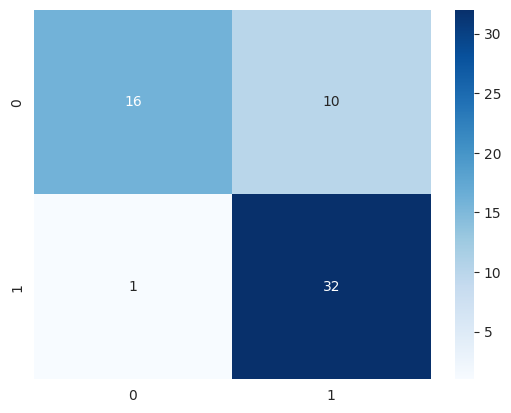

In [77]:
rand_train_scaler, rand_test_scaler = relatorio_ml_scaler(hd4, RandomForestClassifier)

In [78]:
data_scaler = {
    'Models': ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Randon Forest Classifier', 'Ada Boost'],
    'Acuracia Treino': [round(log_train_scaler * 100, 2), round(tree_train_scaler * 100, 2), round(kn_train_scaler * 100, 2),
                        round(rand_train_scaler *100, 2), round(ada_train_scaler * 100, 2)],
    'Acuracia Teste': [round(log_test_scaler * 100, 2), round(tree_test_scaler * 100, 2), round(kn_test_scaler * 100, 2),
                       round(rand_test_scaler * 100, 2), round(ada_test_scaler * 100, 2)],
}
df_scaler = pd.DataFrame(data_scaler)
df_scaler.sort_values(by='Acuracia Teste', ascending=False, inplace=True)
df_scaler

,Models,Acuracia Treino,Acuracia Teste
0,Logistic Regression,87.66,86.44
4,Ada Boost,87.66,86.44
2,KNeighbors,86.38,81.36
3,Randon Forest Classifier,100.00,81.36
1,Decision Tree,100.00,74.58


In [79]:
data = {
    'Models': ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Randon Forest Classifier', 'Ada Boost'],
    'Acuracia Treino': [round(log_train * 100, 2), round(tree_train * 100, 2), round(kn_train * 100, 2),
                        round(rand_train *100, 2), round(ada_train * 100, 2)],
    'Acuracia Teste': [round(log_test * 100, 2), round(tree_test * 100, 2), round(kn_test * 100, 2),
                       round(rand_test * 100, 2), round(ada_test * 100, 2)],
}
df = pd.DataFrame(data)
df.sort_values(by='Acuracia Teste', ascending=False, inplace=True)
df

,Models,Acuracia Treino,Acuracia Teste
0,Logistic Regression,87.66,86.44
4,Ada Boost,87.66,86.44
3,Randon Forest Classifier,100.00,81.36
1,Decision Tree,100.00,79.66
2,KNeighbors,78.30,57.63
